# Volume 4: Hysteresis
    Benj McMullin
    Math 437
    10/26/2023

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.integrate import solve_ivp

In [2]:
def embedding_alg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1e-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

$x = λx − x^3$

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [3]:
# The function F(x, λ) = λx - x^3
def F(x, λ):
    return λ*x - x**3

# Plot the bifurcation diagram
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20, 10)

# The top curve
C1, X1 = embedding_alg(np.linspace(5, -5, 200), 0, F)

# The middle curve
C2, X2 = embedding_alg(np.linspace(5, -5, 500),  np.sqrt(5), F)
C3, X3 = embedding_alg(np.linspace(5, -5, 500), -np.sqrt(5), F)

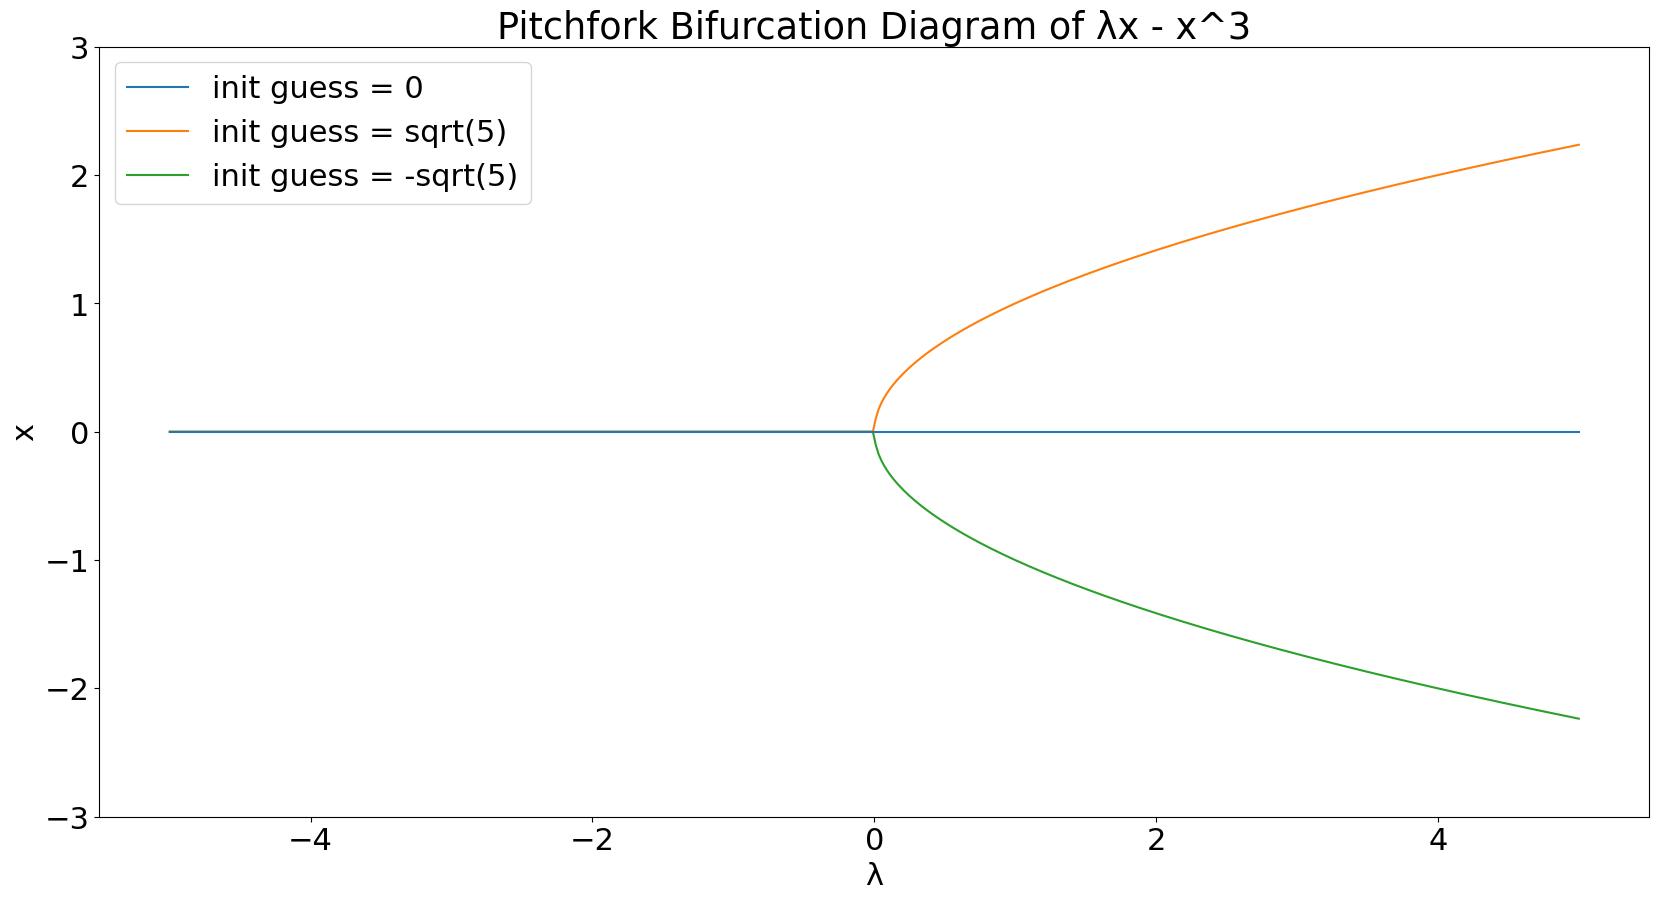

In [5]:
# Plot the bifurcation diagram
plt.plot(C1, X1, zorder = 3, label = 'init guess = 0')
plt.plot(C2, X2, zorder = 2, label = 'init guess = sqrt(5)')
plt.plot(C3, X3, zorder = 1, label = 'init guess = -sqrt(5)')
plt.title('Pitchfork Bifurcation Diagram of λx - x^3')
plt.legend()
plt.xlabel('λ')
plt.ylabel('x')
plt.ylim(-3, 3)
plt.show()

# Problem 2
Find the trajectory of $x' = \lambda x-x^3,$
using the points 

$(\lambda, x_0)\in \left\{\left(\frac{1}{2},\frac{1}{2}\right), \left(\frac{1}{2},\frac{-1}{2}\right), \left(\frac{-1}{2},\frac{1}{2}\right), \left(\frac{-1}{2},\frac{-1}{2}\right) \right\}. $

and the initial condition $x(0)=x_0$ using solve_ivp.
Be sure to include a legend.

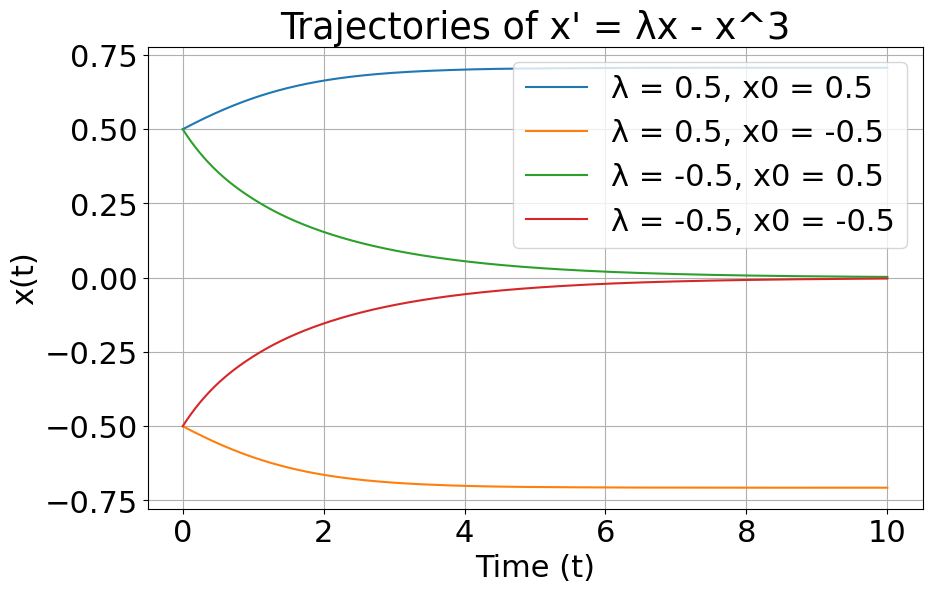

In [9]:
# Define the differential equation
def equation(t, y, lambda_value):
    return lambda_value * y - y**3

# Set the time span for integration
t_span = (0, 10)  # Adjust the time span as needed

# List of lambda values
lambda_values = [0.5, 0.5, -0.5, -0.5]
# List of initial conditions (x0)
x0_values = [0.5, -0.5, 0.5, -0.5]

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Iterate over lambda and initial condition pairs
for lambda_value, x0 in zip(lambda_values, x0_values):
    # Solve the differential equation using solve_ivp
    sol = solve_ivp(equation, t_span, [x0], args=(lambda_value,), dense_output=True)

    # Extract the solution
    t = np.linspace(t_span[0], t_span[1], 1000)
    x = sol.sol(t)

    # Plot the trajectory
    plt.plot(t, x[0], label=f"λ = {lambda_value}, x0 = {x0}")

# Set labels and legend
plt.xlabel("Time (t)")
plt.ylabel("x(t)")
plt.title("Trajectories of x' = λx - x^3")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

$\frac{dx}{dτ} = rx(1 − x/k) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$.
Be sure to include a legend.

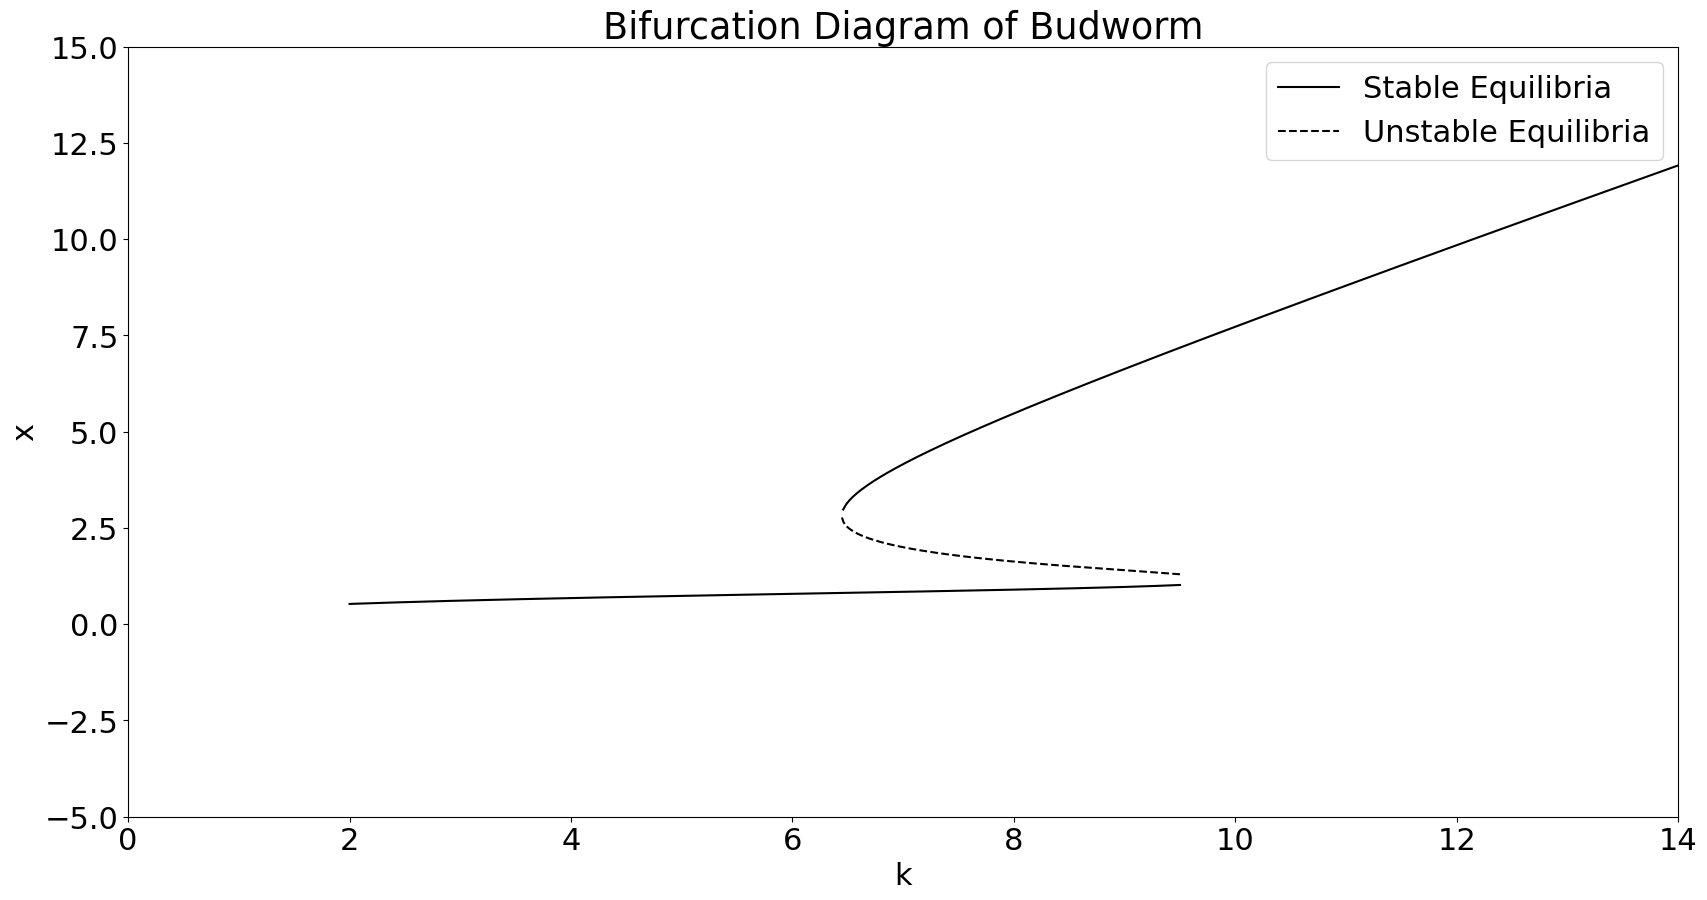

In [6]:
r = 0.56

# The function F(x, k) = rx(1 - x/k) - x^2/(1 + x^2)
F = lambda x, k: r * x * (1 - (x / k)) - (x ** 2) / (1 + x ** 2)

# Set x2 and x3 to be the x values for the two curves
x2 = np.linspace(9.5, 2, 200)
x3 = np.linspace(9.5, 6.4, 200)

# Use the embedding algorithm to find the bifurcation diagram
C1, X1 = embedding_alg(np.linspace(14, 0.01, 500), 8, F)
C2, X2 = embedding_alg(x2, 1, F)
C3, X3 = embedding_alg(x3, 3, F)

# Plot the bifurcation diagram
plt.plot(C1, X1, 'k', label = 'Stable Equilibria')
plt.plot(C2, X2, 'k')
plt.plot(C3, X3, '--k', label = 'Unstable Equilibria')
plt.xlabel('k')
plt.ylabel('x')
plt.title("Bifurcation Diagram of Budworm")
plt.legend()
plt.xlim(0, 14)
plt.ylim(-5, 15)
plt.show()

# Problem 4
Using the time-dependent carrying-capacity

$k(t) = \begin{cases}
  8  & t \in [0,60) \\
  12  & t \in [60,150) \\
  8 & t \in [150,220) \\
  6 & t \in [220,300) \\
\end{cases},$

solve the IVP

$\frac{dx}{dτ} = rx(1 − x/k(t)) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$ and $x(0)=x_0=0.3.$
Be sure to include a legend.

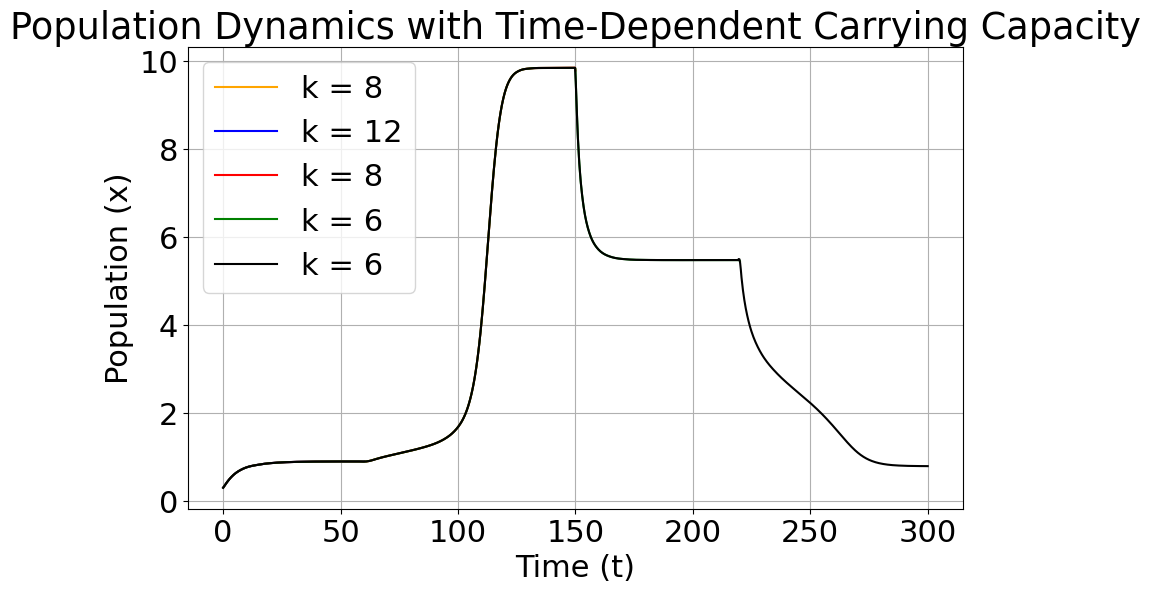

In [23]:
# Define the time-dependent carrying capacity function
def carrying_capacity(t):
    if 0 <= t < 60:
        return 8
    elif 60 <= t < 150:
        return 12
    elif 150 <= t < 220:
        return 8
    elif 220 <= t < 300:
        return 6
    else:
        return 6  # Adjust as needed for time values outside the specified intervals

# Define the IVP
def equation(t, y, r):
    k = carrying_capacity(t)
    return r * y * (1 - y / k) - y**2 / (1 + y**2)

# Set the time span for integration
t_span = (0, 300)

# Define parameters
r = 0.56
x0 = 0.3

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Initialize a list of unique time values and carrying capacity values
unique_times = [0, 60, 150, 220, 300]
unique_k_values = [8, 12, 8, 6, 6]

# Define a list of colors for each section
colors = ['orange', 'blue', 'red', 'green', 'black']

# Solve the IVP using solve_ivp for each unique time value
for t_end, k_value, color in zip(unique_times, unique_k_values, colors):
    t_span_i = (0, t_end)
    sol = solve_ivp(equation, t_span_i, [x0], args=(r,), dense_output=True)

    # Extract the solution
    t_i = np.linspace(t_span_i[0], t_span_i[1], 1000)
    x_i = sol.sol(t_i)

    # Plot the solution with a legend entry for each time value and carrying capacity
    plt.plot(t_i, x_i[0], label=f"k = {k_value}", color=color)

# Set labels and legend
plt.xlabel("Time (t)")
plt.ylabel("Population (x)")
plt.title("Population Dynamics with Time-Dependent Carrying Capacity")
plt.legend()
plt.grid()

# Show the plot
plt.show()